In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Get the Data:

df=pd.read_csv('train-2.csv')
#df1=pd.read_csv('test.csv')
pd.set_option('display.max_columns',None)
df

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
0,F1,Airline B,NaN,Greenshire,8286.0,8:23,20:19,11.94,Boeing 787,0,Wednesday,December,Summer,Low,Rain,240,Special Offer,0.91,643.93
1,F2,Airline C,Leonardland,New Stephen,2942.0,20:28,1:45,5.29,Airbus A320,0,Wednesday,March,Spring,Low,Rain,107,None,1.08,423.13
2,F3,Airline B,South Dylanville,Port Ambermouth,2468.0,11:30,15:54,4.41,Boeing 787,1,Sunday,September,Summer,High,Cloudy,131,NaN,0.52,442.17
3,F4,NaN,Blakefort,Crosbyberg,3145.0,20:24,1:21,4.96,Boeing 787,0,Sunday,February,Fall,Low,Cloudy,170,Discount,0.71,394.42
4,F5,Airline B,Michaelport,Onealborough,5558.0,21:59,6:04,8.09,Boeing 737,1,Thursday,January,None,NaN,Clear,181,None,1.09,804.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67


In [ ]:
#Exploratory Data Analysis (EDA):

df.head()
df.isna().sum()

Flight_ID                0
Airline               3573
Departure_City         340
Arrival_City           186
Distance                91
Departure_Time           0
Arrival_Time             0
Duration                 0
Aircraft_Type           43
Number_of_Stops          0
Day_of_Week            225
Month_of_Travel        267
Holiday_Season           0
Demand                 317
Weather_Conditions     302
Passenger_Count          0
Promotion_Type         403
Fuel_Price              90
Flight_Price             0
dtype: int64

In [ ]:
df.tail(10)

,Flight_ID,Airline,Departure_City,Arrival_City,Distance,Departure_Time,Arrival_Time,Duration,Aircraft_Type,Number_of_Stops,Day_of_Week,Month_of_Travel,Holiday_Season,Demand,Weather_Conditions,Passenger_Count,Promotion_Type,Fuel_Price,Flight_Price
44990,F44991,Airline B,Lake Joshua,North Alyssachester,8637.0,20:05,8:14,12.16,Airbus A380,0,Wednesday,November,None,Low,Rain,271,Special Offer,0.70,548.82
44991,F44992,Airline B,West Kelly,Jacksonview,9066.0,7:35,19:35,12.00,Airbus A320,1,Sunday,March,Fall,Low,Rain,164,Discount,0.75,666.51
44992,F44993,Airline C,East Karen,Matthewburgh,2311.0,21:23,0:45,3.37,Airbus A320,1,Monday,December,None,Low,Rain,245,Special Offer,0.90,420.93
44993,F44994,Airline A,Danielbury,South Susanville,9512.0,5:59,19:35,13.60,Boeing 777,3,Monday,December,Fall,Low,Rain,114,Discount,0.66,785.65
44994,F44995,Airline A,Lake Katiestad,Rachelshire,9318.0,15:43,3:48,12.09,Airbus A320,1,Tuesday,April,Summer,Low,Snow,176,None,0.75,613.50
44995,F44996,Airline B,Port Donaldland,Maryshire,3884.0,21:49,3:31,5.70,Boeing 787,1,Sunday,May,Fall,Low,Clear,263,Discount,0.69,417.18
44996,F44997,Airline A,East Patriciafurt,East Vickiberg,9191.0,22:50,11:48,12.97,Airbus A320,1,Friday,December,Fall,Low,Snow,168,Discount,0.74,687.03
44997,F44998,Airline C,Monicaton,West Johnburgh,6757.0,2:33,11:21,8.81,Boeing 777,1,Wednesday,October,Fall,Low,Snow,244,Special Offer,0.83,547.39
44998,F44999,Airline B,Turnerburgh,Gabrielville,3587.0,13:25,19:37,6.21,Boeing 737,0,Saturday,June,None,Medium,Cloudy,121,Special Offer,0.60,487.67
44999,F45000,Airline B,Harrisport,Chelsealand,4890.0,3:37,11:19,7.70,Airbus A320,0,Monday,December,Winter,Low,Rain,91,None,0.95,532.92


In [ ]:
df.describe()

,Distance,Duration,Number_of_Stops,Passenger_Count,Fuel_Price,Flight_Price
count,44909.000000,45000.000000,45000.000000,45000.000000,44910.000000,45000.000000
mean,5482.238727,7.852555,0.665667,174.928822,0.850192,574.606270
std,2594.847860,3.292880,0.750578,72.372980,0.201736,160.239344
min,1000.000000,1.280000,0.000000,50.000000,0.500000,173.350000
25%,3230.000000,5.040000,0.000000,112.000000,0.680000,455.297500
50%,5476.000000,7.840000,1.000000,175.000000,0.850000,565.750000
75%,7725.000000,10.650000,1.000000,238.000000,1.020000,679.692500
max,10000.000000,14.450000,3.000000,300.000000,1.200000,1261.640000


In [ ]:
df.dtypes

Flight_ID              object
Airline                object
Departure_City         object
Arrival_City           object
Distance              float64
Departure_Time         object
Arrival_Time           object
Duration              float64
Aircraft_Type          object
Number_of_Stops         int64
Day_of_Week            object
Month_of_Travel        object
Holiday_Season         object
Demand                 object
Weather_Conditions     object
Passenger_Count         int64
Promotion_Type         object
Fuel_Price            float64
Flight_Price          float64
dtype: object

In [ ]:
df.shape

(45000, 19)

In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
print(df.columns)
df.drop(columns = ['Flight_ID', 'Airline','Departure_City','Arrival_City','Departure_Time','Arrival_Time'],inplace=True)
df1.drop(columns = ['Flight_ID', 'Airline','Departure_City','Arrival_City','Departure_Time','Arrival_Time'],inplace=True)

Index(['Flight_ID', 'Airline', 'Departure_City', 'Arrival_City', 'Distance',
       'Departure_Time', 'Arrival_Time', 'Duration', 'Aircraft_Type',
       'Number_of_Stops', 'Day_of_Week', 'Month_of_Travel', 'Holiday_Season',
       'Demand', 'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price', 'Flight_Price'],
      dtype='object')


In [ ]:
df.isna().sum()
df1.isna().sum()

Distance               9
Duration               0
Aircraft_Type          8
Number_of_Stops        0
Day_of_Week           25
Month_of_Travel       34
Holiday_Season         0
Demand                34
Weather_Conditions    49
Passenger_Count        0
Promotion_Type        49
Fuel_Price            10
dtype: int64

In [ ]:
print(df.shape)
df1.shape

(45000, 13)


(5000, 12)

In [ ]:
df = df.fillna({'Promotion_Type': 'None'})
df1 = df1.fillna({'Promotion_Type': 'None'})
df1.isna().sum()

Distance               9
Duration               0
Aircraft_Type          8
Number_of_Stops        0
Day_of_Week           25
Month_of_Travel       34
Holiday_Season         0
Demand                34
Weather_Conditions    49
Passenger_Count        0
Promotion_Type         0
Fuel_Price            10
dtype: int64

In [ ]:
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()
df.isna().sum()

Distance              0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [ ]:

df1.shape
df.shape

(43679, 13)

In [ ]:
df.isna().sum()

Distance              0
Duration              0
Aircraft_Type         0
Number_of_Stops       0
Day_of_Week           0
Month_of_Travel       0
Holiday_Season        0
Demand                0
Weather_Conditions    0
Passenger_Count       0
Promotion_Type        0
Fuel_Price            0
Flight_Price          0
dtype: int64

In [ ]:
df.columns

Index(['Distance', 'Duration', 'Aircraft_Type', 'Number_of_Stops',
       'Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand',
       'Weather_Conditions', 'Passenger_Count', 'Promotion_Type', 'Fuel_Price',
       'Flight_Price'],
      dtype='object')

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 69.2 MB/s eta 0:00:00


In [ ]:
#Data Visualization (Using SweetViz):

import sweetviz as sv

# Create a report
report = sv.analyze([df, "Dataframe"], target_feat='Flight_Price')

# Display the report in a web browser
report.show_html('report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
report1 = sv.compare([df, "Train"], [df1, "Test"])
report1.show_html("comparison_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


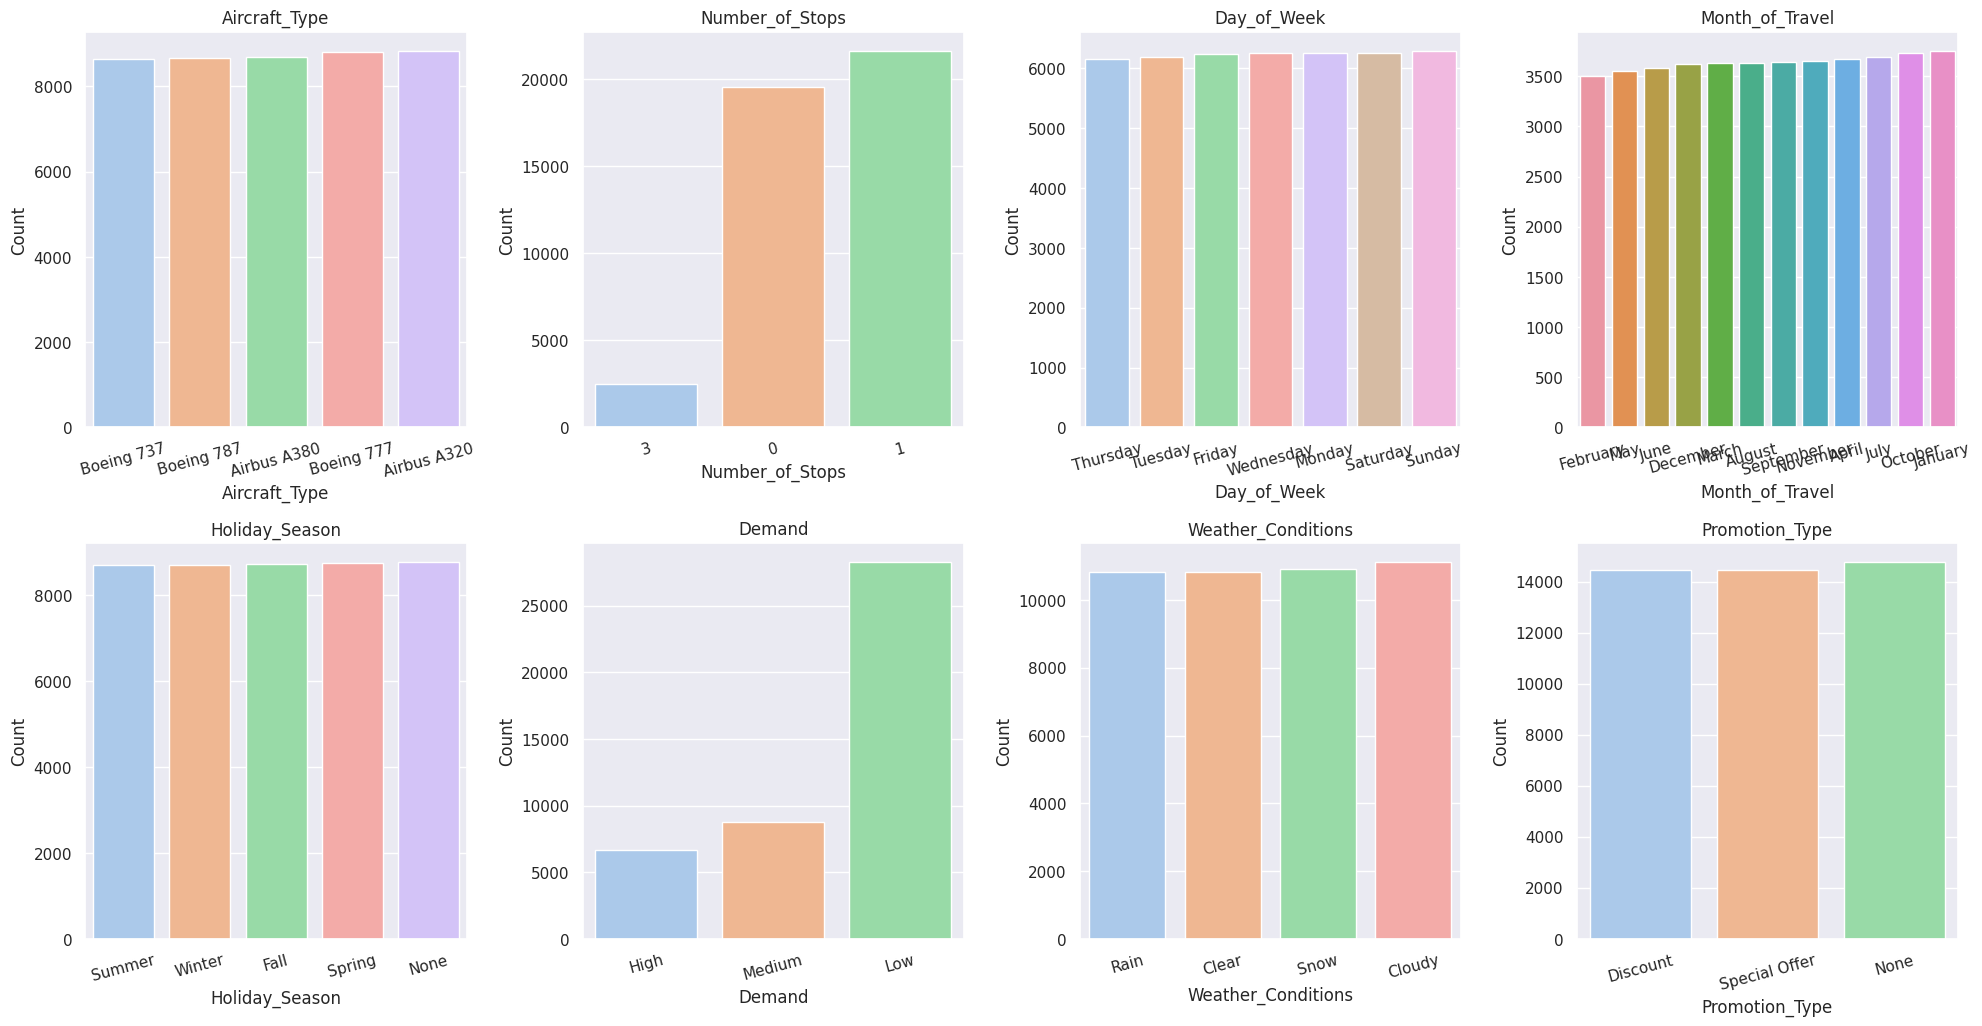

In [ ]:
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(541)
sns.countplot(x=df['Aircraft_Type'], order=df['Aircraft_Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Aircraft_Type')
plt.ylabel('Count')
plt.title('Aircraft_Type')

plt.subplot(542)
sns.countplot(x=df['Number_of_Stops'], order=df['Number_of_Stops'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Number_of_Stops')
plt.ylabel('Count')
plt.title('Number_of_Stops')

plt.subplot(543)
sns.countplot(x=df['Day_of_Week'], order=df['Day_of_Week'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Day_of_Week')
plt.ylabel('Count')
plt.title('Day_of_Week')

plt.subplot(544)
sns.countplot(x=df['Month_of_Travel'], order=df['Month_of_Travel'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Month_of_Travel')
plt.ylabel('Count')
plt.title('Month_of_Travel')

plt.subplot(545)
sns.countplot(x=df['Holiday_Season'], order=df['Holiday_Season'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Holiday_Season')
plt.ylabel('Count')
plt.title('Holiday_Season')

plt.subplot(546)
sns.countplot(x=df['Demand'], order=df['Demand'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Demand')
plt.ylabel('Count')
plt.title('Demand')

plt.subplot(547)
sns.countplot(x=df['Weather_Conditions'], order=df['Weather_Conditions'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Weather_Conditions')
plt.ylabel('Count')
plt.title('Weather_Conditions')

plt.subplot(548)
sns.countplot(x=df['Promotion_Type'], order=df['Promotion_Type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Promotion_Type')
plt.ylabel('Count')
plt.title('Promotion_Type')

plt.tight_layout()

Text(0.5, 1.0, 'Promotion_Type vs Flight_Price')

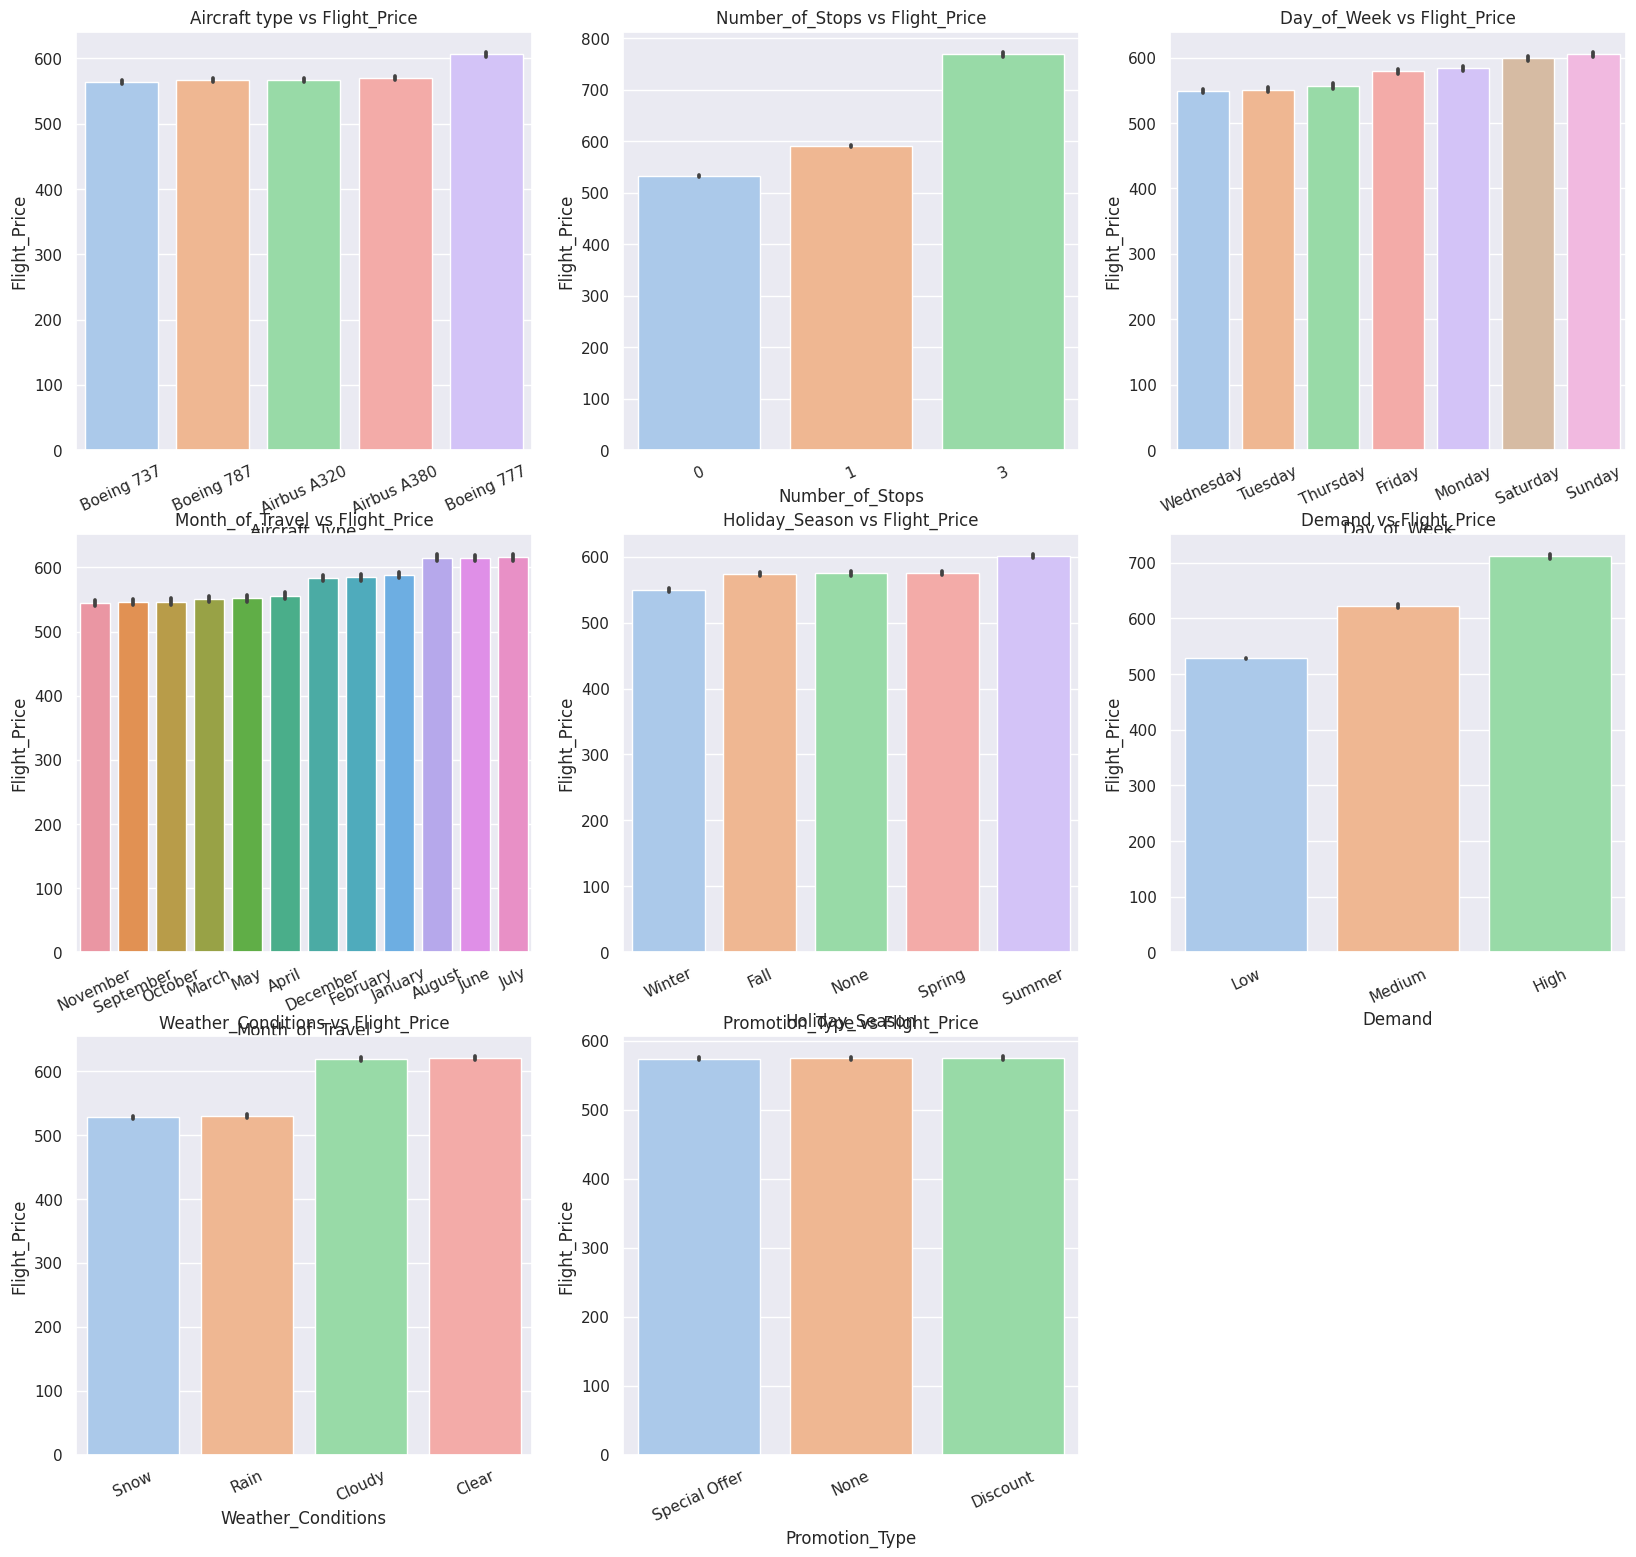

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(x=df['Aircraft_Type'],y=df['Flight_Price'], order = df.groupby('Aircraft_Type')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Aircraft_Type'])
plt.xlabel('Aircraft_Type')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Aircraft type vs Flight_Price')

plt.subplot(432)
sns.barplot(x=df['Number_of_Stops'],y=df['Flight_Price'], order = df.groupby('Number_of_Stops')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Number_of_Stops'])
plt.xlabel('Number_of_Stops')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Number_of_Stops vs Flight_Price')

plt.subplot(433)
sns.barplot(x=df['Day_of_Week'],y=df['Flight_Price'], order = df.groupby('Day_of_Week')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Day_of_Week'])
plt.xlabel('Day_of_Week')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Day_of_Week vs Flight_Price')

plt.subplot(434)
sns.barplot(x=df['Month_of_Travel'],y=df['Flight_Price'], order = df.groupby('Month_of_Travel')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Month_of_Travel'])
plt.xlabel('Month_of_Travel')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Month_of_Travel vs Flight_Price')

plt.subplot(435)
sns.barplot(x=df['Holiday_Season'],y=df['Flight_Price'], order = df.groupby('Holiday_Season')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Holiday_Season'])
plt.xlabel('Holiday_Season')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Holiday_Season vs Flight_Price')

plt.subplot(436)
sns.barplot(x=df['Demand'],y=df['Flight_Price'], order = df.groupby('Demand')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Demand'])
plt.xlabel('Demand')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Demand vs Flight_Price')

plt.subplot(437)
sns.barplot(x=df['Weather_Conditions'],y=df['Flight_Price'], order = df.groupby('Weather_Conditions')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Weather_Conditions'])
plt.xlabel('Weather_Conditions')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Weather_Conditions vs Flight_Price')

plt.subplot(438)
sns.barplot(x=df['Promotion_Type'],y=df['Flight_Price'], order = df.groupby('Promotion_Type')['Flight_Price'].mean().reset_index().sort_values('Flight_Price')['Promotion_Type'])
plt.xlabel('Promotion_Type')
plt.xticks(rotation=25)
plt.ylabel('Flight_Price')
plt.title('Promotion_Type vs Flight_Price')

Text(0.5, 1.0, 'Fuel_Price vs Flight_Price')

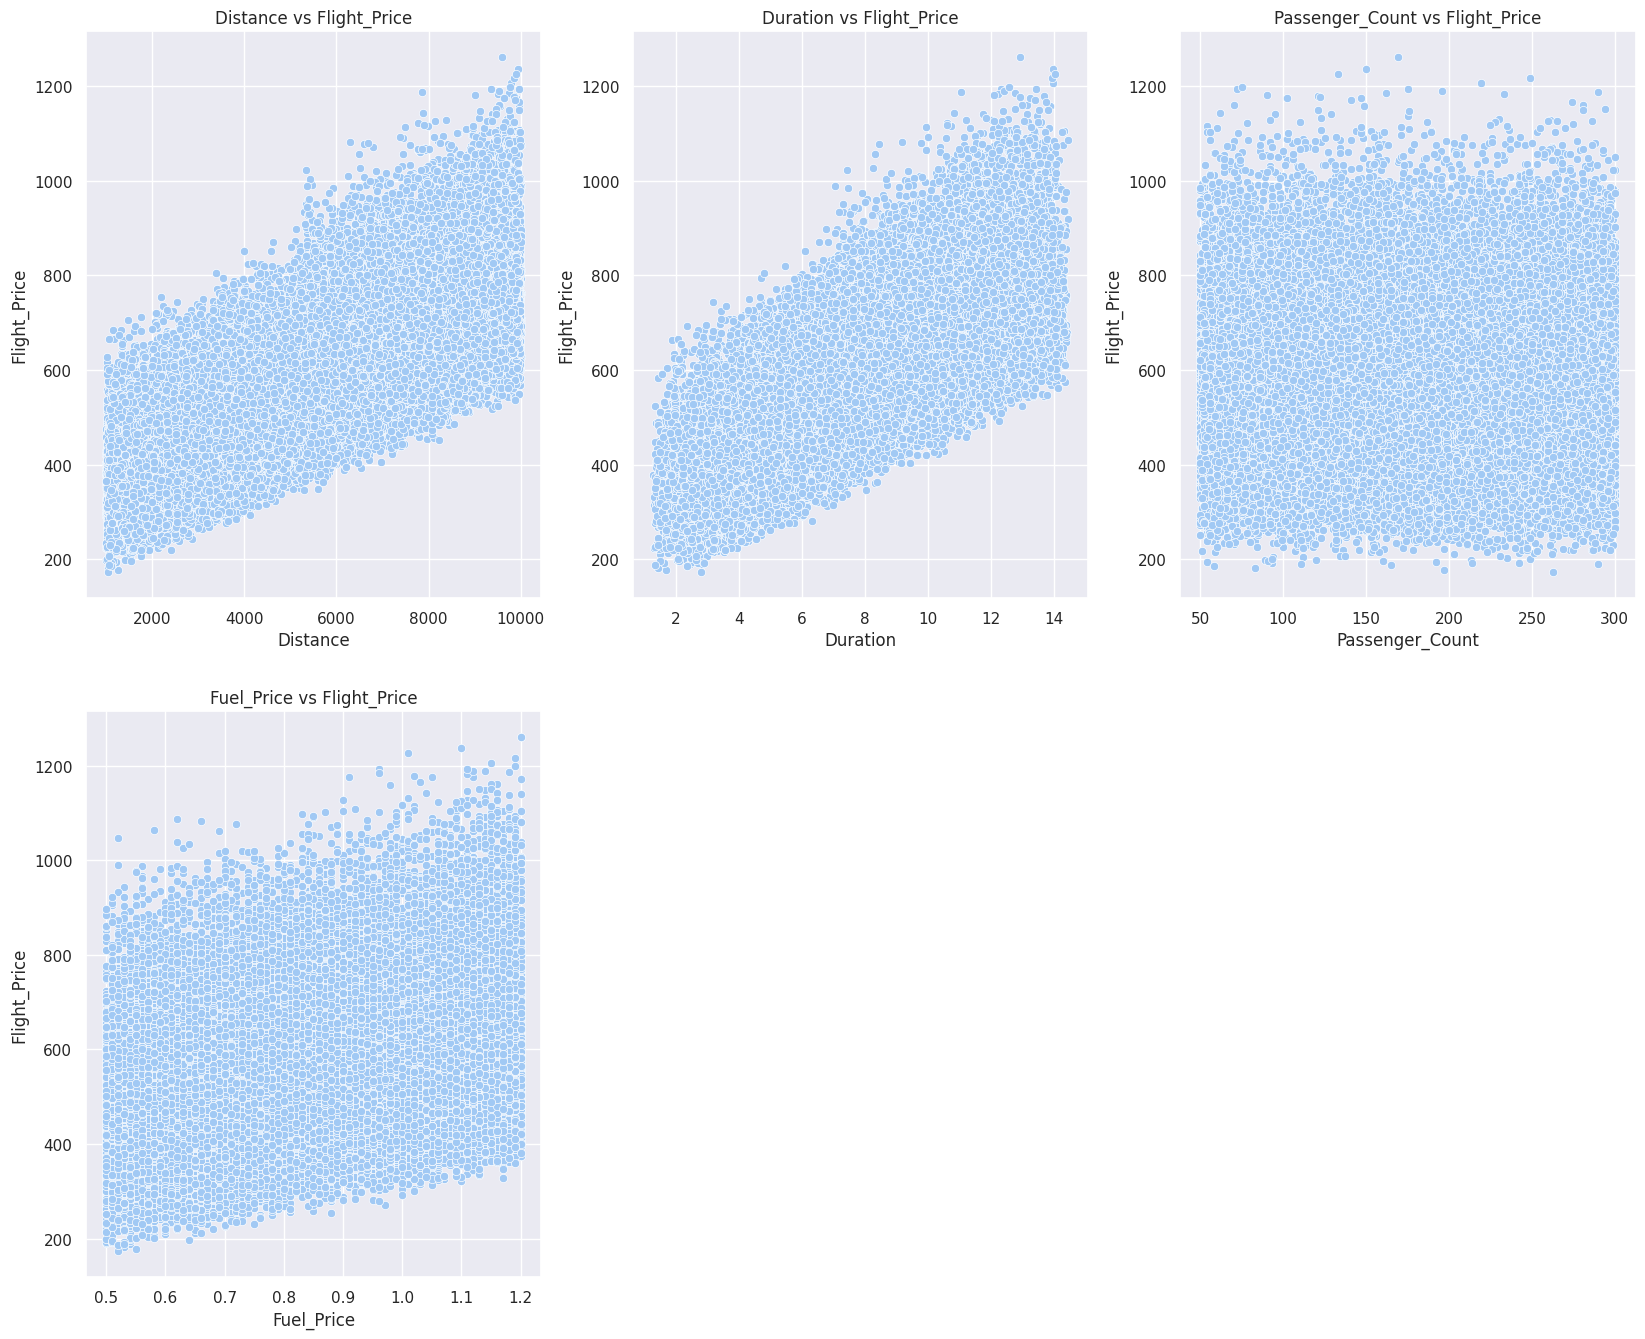

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.scatterplot(x=df['Distance'],y=df['Flight_Price'])
plt.title('Distance vs Flight_Price')

plt.subplot(332)
sns.scatterplot(x=df['Duration'],y=df['Flight_Price'])
plt.title('Duration vs Flight_Price')

plt.subplot(333)
sns.scatterplot(x=df['Passenger_Count'],y=df['Flight_Price'])
plt.title('Passenger_Count vs Flight_Price')

plt.subplot(334)
sns.scatterplot(x=df['Fuel_Price'],y=df['Flight_Price'])
plt.title('Fuel_Price vs Flight_Price')


Text(0.5, 1.0, 'Passenger_Count vs Flight_Price')

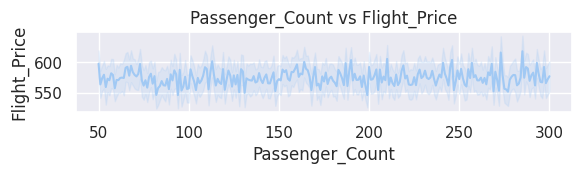

In [ ]:

plt.subplot(411)
sns.lineplot(x=df['Passenger_Count'],y=df['Flight_Price'])
plt.title('Passenger_Count vs Flight_Price')

In [ ]:
df.columns
df1.columns

Index(['Distance', 'Duration', 'Aircraft_Type', 'Number_of_Stops',
       'Day_of_Week', 'Month_of_Travel', 'Holiday_Season', 'Demand',
       'Weather_Conditions', 'Passenger_Count', 'Promotion_Type',
       'Fuel_Price'],
      dtype='object')

In [ ]:
df[['Duration','Flight_Price']].corr() #High positive (negative) correlation



,Duration,Flight_Price
Duration,1.000000,0.760202
Flight_Price,0.760202,1.000000


In [ ]:
df[['Number_of_Stops','Flight_Price']].corr() #Low positive (negative) correlation


,Number_of_Stops,Flight_Price
Number_of_Stops,1.000000,0.341945
Flight_Price,0.341945,1.000000


In [ ]:
df[['Passenger_Count','Flight_Price']].corr()  #	negligible correlation


,Passenger_Count,Flight_Price
Passenger_Count,1.000000,0.006416
Flight_Price,0.006416,1.000000


In [ ]:
df[['Fuel_Price','Flight_Price']].corr() #Low positive (negative) correlation


,Fuel_Price,Flight_Price
Fuel_Price,1.000000,0.348193
Flight_Price,0.348193,1.000000


In [ ]:
df[['Distance','Flight_Price']].corr() #High positive (negative) correlation

,Distance,Flight_Price
Distance,1.000000,0.763691
Flight_Price,0.763691,1.000000


In [ ]:
del df['Passenger_Count']
del df['Promotion_Type']
del df['Holiday_Season']
del df['Aircraft_Type']


In [ ]:
del df1['Passenger_Count']
del df1['Promotion_Type']
del df1['Holiday_Season']
del df1['Aircraft_Type']

In [ ]:
df.columns

Index(['Distance', 'Duration', 'Number_of_Stops', 'Day_of_Week',
       'Month_of_Travel', 'Demand', 'Weather_Conditions', 'Fuel_Price',
       'Flight_Price'],
      dtype='object')

In [ ]:
df1.columns

Index(['Distance', 'Duration', 'Number_of_Stops', 'Day_of_Week',
       'Month_of_Travel', 'Demand', 'Weather_Conditions', 'Fuel_Price'],
      dtype='object')

In [ ]:
df['Distance'].quantile(0.75),df['Distance'].quantile(0.25)
iqr=df['Distance'].quantile(0.75)-df['Distance'].quantile(0.25)
lw_otlr=df['Distance'].quantile(0.25)-(1.5*iqr)
upr_otlr=df['Distance'].quantile(0.75)+(1.5*iqr)
print(lw_otlr,upr_otlr) #if low or upper values cross below limmits called outlayers

iqr=df['Duration'].quantile(0.75)-df['Duration'].quantile(0.25)
lw_otlr=df['Duration'].quantile(0.25)-(1.5*iqr)
upr_otlr=df['Duration'].quantile(0.75)+(1.5*iqr)
print(lw_otlr,upr_otlr) #if low or upper values cross below limmits called outlayers

iqr=df['Fuel_Price'].quantile(0.75)-df['Fuel_Price'].quantile(0.25)
lw_otlr=df['Fuel_Price'].quantile(0.25)-(1.5*iqr)
upr_otlr=df['Fuel_Price'].quantile(0.75)+(1.5*iqr)
lw_otlr,upr_otlr #if low or upper values cross below limmits called outlayers

-3518.25 14471.75
-3.3999999999999995 19.08


(0.17000000000000004, 1.53)

In [ ]:
df.describe()

,Distance,Duration,Number_of_Stops,Fuel_Price,Flight_Price
count,43679.000000,43679.000000,43679.00000,43679.000000,43679.000000
mean,5480.568511,7.851374,0.66643,0.850256,574.713935
std,2596.316775,3.294201,0.75151,0.201818,160.438434
min,1000.000000,1.280000,0.00000,0.500000,173.350000
25%,3228.000000,5.030000,0.00000,0.680000,455.110000
50%,5473.000000,7.830000,1.00000,0.850000,565.900000
75%,7725.500000,10.650000,1.00000,1.020000,679.990000
max,10000.000000,14.450000,3.00000,1.200000,1261.640000


In [ ]:
print(df['Day_of_Week'].value_counts())
print(df['Month_of_Travel'].value_counts())
print(df['Demand'].value_counts())
print(df['Weather_Conditions'].value_counts())

df.columns

Sunday       6298
Saturday     6265
Monday       6257
Wednesday    6256
Friday       6247
Tuesday      6194
Thursday     6162
Name: Day_of_Week, dtype: int64
January      3757
October      3730
July         3688
April        3670
November     3655
September    3646
August       3634
March        3633
December     3622
June         3586
May          3555
February     3503
Name: Month_of_Travel, dtype: int64
Low       28282
Medium     8754
High       6643
Name: Demand, dtype: int64
Cloudy    11120
Snow      10910
Clear     10827
Rain      10822
Name: Weather_Conditions, dtype: int64


Index(['Distance', 'Duration', 'Number_of_Stops', 'Day_of_Week',
       'Month_of_Travel', 'Demand', 'Weather_Conditions', 'Fuel_Price',
       'Flight_Price'],
      dtype='object')

In [ ]:
#Data Encoding:
#df['Day_of_Week'] = df['Day_of_Week'].map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})
#df['Month_of_Travel']=df['Month_of_Travel'].map({'January' : 0, 'February':1 ,'March':2 , 'April':3 ,'May':4 ,'June':5 ,'July':6 ,'August':7 ,'September':8 ,'October':9 ,'November':10 ,'December':11})
df.drop(columns=['Day_of_Week','Month_of_Travel'],inplace=True)
df1.drop(columns=['Day_of_Week','Month_of_Travel'],inplace=True)
#del df.Day_of_Week
#del df.Month_of_Travel


In [ ]:
df['Demand']=df['Demand'].map({'Low':0,'Medium':1,'High':2})
df['Weather_Conditions']=df['Weather_Conditions'].map({'Cloudy':0,'Snow':1,'Rain':2,'Clear':3})

In [ ]:

df1['Demand']=df1['Demand'].map({'Low':0,'Medium':1,'High':2})
df1['Weather_Conditions']=df1['Weather_Conditions'].map({'Cloudy':0,'Snow':1,'Rain':2,'Clear':3})

In [ ]:
df

,Distance,Duration,Number_of_Stops,Demand,Weather_Conditions,Fuel_Price,Flight_Price
0,8286.0,11.94,0,0,2,0.91,643.93
1,2942.0,5.29,0,0,2,1.08,423.13
2,2468.0,4.41,1,2,0,0.52,442.17
3,3145.0,4.96,0,0,0,0.71,394.42
6,3274.0,5.60,0,0,3,1.03,429.53
...,...,...,...,...,...,...,...
44995,3884.0,5.70,1,0,3,0.69,417.18
44996,9191.0,12.97,1,0,1,0.74,687.03
44997,6757.0,8.81,1,0,1,0.83,547.39
44998,3587.0,6.21,0,1,0,0.60,487.67


In [ ]:
df1

,Distance,Duration,Number_of_Stops,Demand,Weather_Conditions,Fuel_Price
0,3096.0,5.52,1,1,3,0.95
1,8760.0,11.80,1,2,3,1.05
2,6365.0,9.59,1,0,2,0.63
3,7836.0,10.21,0,0,2,0.88
4,1129.0,1.86,1,2,0,1.11
...,...,...,...,...,...,...
4994,5880.0,7.81,0,0,1,0.87
4995,9389.0,12.35,1,2,0,0.51
4996,7718.0,11.55,1,0,2,0.50
4997,2597.0,4.93,1,0,1,0.55


In [ ]:
X = df.drop('Flight_Price',axis=1)
X

,Distance,Duration,Number_of_Stops,Demand,Weather_Conditions,Fuel_Price
0,8286.0,11.94,0,0,2,0.91
1,2942.0,5.29,0,0,2,1.08
2,2468.0,4.41,1,2,0,0.52
3,3145.0,4.96,0,0,0,0.71
6,3274.0,5.60,0,0,3,1.03
...,...,...,...,...,...,...
44995,3884.0,5.70,1,0,3,0.69
44996,9191.0,12.97,1,0,1,0.74
44997,6757.0,8.81,1,0,1,0.83
44998,3587.0,6.21,0,1,0,0.60


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.0805552 ,  1.24117263, -0.88679855, -0.67783538,  0.45623927,
         0.29603442],
       [-0.97776881, -0.77754912, -0.88679855, -0.67783538,  0.45623927,
         1.13838561],
       [-1.16033722, -1.04468823,  0.44387148,  2.0088408 , -1.32919056,
        -1.63641832],
       ...,
       [ 0.49163727,  0.29100736,  0.44387148, -0.67783538, -0.43647564,
        -0.10036615],
       [-0.72933712, -0.49826731, -0.88679855,  0.66550271, -1.32919056,
        -1.24001776],
       [-0.22746657, -0.04595221, -0.88679855, -0.67783538,  0.45623927,
         0.4942347 ]])

In [ ]:
y = df['Flight_Price']
y

0        643.93
1        423.13
2        442.17
3        394.42
6        429.53
          ...  
44995    417.18
44996    687.03
44997    547.39
44998    487.67
44999    532.92
Name: Flight_Price, Length: 43679, dtype: float64

In [ ]:
#Data Preprocessing:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(34943, 6) (8736, 6) (34943,) (8736,)


Machine Learning Model Selection:

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [ ]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[501.34400793 877.75448093 548.30526443 ... 720.69118303 698.33230237
 767.8054289 ]
32175    454.01
34806    991.15
17332    552.55
32314    389.08
14643    465.20
          ...  
5390     673.86
7792     427.94
38543    778.70
28819    729.80
2394     756.91
Name: Flight_Price, Length: 8736, dtype: float64


In [ ]:
linear_model.score(X_test, y_test)

0.9401052217516292

In [ ]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.9403719060462713

 K Nearest Neighbor Regression


 Choosing the best K(neighbor) Value

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,20)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  0.9008070486436143
K value :  2  train score :  0.9752110814605163 cross_val_score :  0.9256146805787443
K value :  3  train score :  0.9669895308541933 cross_val_score :  0.9340433831154765
K value :  4  train score :  0.9628917982123348 cross_val_score :  0.9379562695948396
K value :  5  train score :  0.9603711366187498 cross_val_score :  0.9405302482386647
K value :  6  train score :  0.9586842970651483 cross_val_score :  0.9420247004354648
K value :  7  train score :  0.9574971942185778 cross_val_score :  0.9433437142773204
K value :  8  train score :  0.9566321635331209 cross_val_score :  0.9442413267066703
K value :  9  train score :  0.9559936659093655 cross_val_score :  0.9448930218190528
K value :  10  train score :  0.9554057830299052 cross_val_score :  0.9455084391012433
K value :  11  train score :  0.9549847386187523 cross_val_score :  0.9459054528975142
K value :  12  train score :  0.954614215162634 cross_val_score :  

In [ ]:
cross_val_knn_regressor=max(cross_val_knn)
cross_val_knn_regressor

0.9474038587707174

 Implementing K Nearest Neighbor Regression

In [ ]:
knn_regressor=KNeighborsRegressor(n_neighbors=6)
knn_regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.9420522553263921

 Decision Tree Regression

 Choosing the best of depth Value

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.44883219871001623 cross_val_score :  0.4485652080156708
Depth :  2  train Score  :  0.6115387959390406 cross_val_score :  0.6111943865786734
Depth :  3  train Score  :  0.7199260056696779 cross_val_score :  0.7177421756084672
Depth :  4  train Score  :  0.8101511226779808 cross_val_score :  0.8066449611900787
Depth :  5  train Score  :  0.8596627582521584 cross_val_score :  0.8559228000346722
Depth :  6  train Score  :  0.8897828589673319 cross_val_score :  0.884400237580571
Depth :  7  train Score  :  0.9155149839640706 cross_val_score :  0.9085095951159949
Depth :  8  train Score  :  0.9329830100883001 cross_val_score :  0.9249504854230114
Depth :  9  train Score  :  0.944920356244664 cross_val_score :  0.9345515155533102
Depth :  10  train Score  :  0.9530918757045885 cross_val_score :  0.9371711480343384
Depth :  11  train Score  :  0.9599568651231802 cross_val_score :  0.935491502145363
Depth :  12  train Score  :  0.9664475528170251 cross_val_score :

In [ ]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor
'The best depth is 13 and Cross_val_score is:',cross_val_dt_regressor

('The best depth is 13 and Cross_val_score is:', 0.9371711480343384)

Implementing Decision Tree Regression

In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=14, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9178434332522686

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.571757,Distance
3,0.197392,Demand
5,0.131575,Fuel_Price
1,0.053090,Duration
2,0.044287,Number_of_Stops
4,0.001900,Weather_Conditions


Random Forest Regression

Choosing the best depth value

In [ ]:
max_depth=np.array([15,18,20,22,24])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  15 cross_val_score :  0.9441144692035977
Depth :  18 cross_val_score :  0.9430700983747611
Depth :  20 cross_val_score :  0.9428767477448687
Depth :  22 cross_val_score :  0.9428112769686303
Depth :  24 cross_val_score :  0.9427709892365411


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)
"The best depth is 22 and Cross_val_score is:",cross_val_rf_regressor

('The best depth is 22 and Cross_val_score is:', 0.9441144692035977)

Implementing Random Forest Regression

In [ ]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9428767477448687

Extreme Gradient Boosting Regression

Choosing the best Learning Rate

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7944363431000078
Learning rate :  0.05 cross_val_score: 0.949323591978302
Learning rate :  0.08 cross_val_score: 0.9492871399935751
Learning rate :  0.1 cross_val_score: 0.9490107576916951
Learning rate :  0.2 cross_val_score: 0.947647456947223
Learning rate :  0.25 cross_val_score: 0.9469629902029306
Learning rate :  0.3 cross_val_score: 0.9461285737441145


In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)
"The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor

('The best Learning rate is 0.1 and Cross_val_score is:', 0.949323591978302)

Implementing Extreme Gradient Boosting Regression

In [ ]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9490107576916951

In [ ]:
y_predic=xgb_regressor.predict(X_test)

y_predic

array([472.5083 , 922.1007 , 550.25684, ..., 737.80896, 678.7714 ,
       778.1822 ], dtype=float32)

In [ ]:
y_test

32175    454.01
34806    991.15
17332    552.55
32314    389.08
14643    465.20
          ...  
5390     673.86
7792     427.94
38543    778.70
28819    729.80
2394     756.91
Name: Flight_Price, Length: 8736, dtype: float64

In [ ]:
y_predic,y_test

(array([472.5083 , 922.1007 , 550.25684, ..., 737.80896, 678.7714 ,
        778.1822 ], dtype=float32),
 32175    454.01
 34806    991.15
 17332    552.55
 32314    389.08
 14643    465.20
           ...  
 5390     673.86
 7792     427.94
 38543    778.70
 28819    729.80
 2394     756.91
 Name: Flight_Price, Length: 8736, dtype: float64)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE
mse = mean_squared_error(y_test, y_predic)
rmse = np.sqrt(mse)
rmse

36.48349468558342

In [ ]:
test
y_predict=xgb_regressor.predict(df1)

array([925.04987, 933.6132 , 770.71185, ..., 765.4298 , 760.70746,
       909.38416], dtype=float32)

In [ ]:

mse = mean_squared_error(y_test, y_predic)
rmse = np.sqrt(mse)
rmse

Cross-Validation Score for Machine-Learning Models

In [ ]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.9403719060462713
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.9420522553263921
Cross Validation Score for Decision Tree Regression Model:  0.9178434332522686
Cross Validation Score for Random Forest Regression Model:  0.9428767477448687
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9490107576916951


R2 Score for Machine-Learning Models

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [ ]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [ ]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.9401052217516292
R2 Score for K-Nearest Neighbors Regression Model: 0.941728389719834
R2 Score for Decision Tree Regression Model:  0.9189728438505963
R2 Score for Random Forest Regression Model:  0.9426643133983703
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9483945279337131


 Suggestion to Sellers and buyers-Solving problem statements based on Feature Importance

In [ ]:
xgb_regressor.feature_importances_

array([0.3023311 , 0.10907086, 0.0606219 , 0.45475003, 0.00075641,
       0.07246983], dtype=float32)

In [ ]:
df.columns

Index(['Distance', 'Duration', 'Number_of_Stops', 'Demand',
       'Weather_Conditions', 'Fuel_Price', 'Flight_Price'],
      dtype='object')

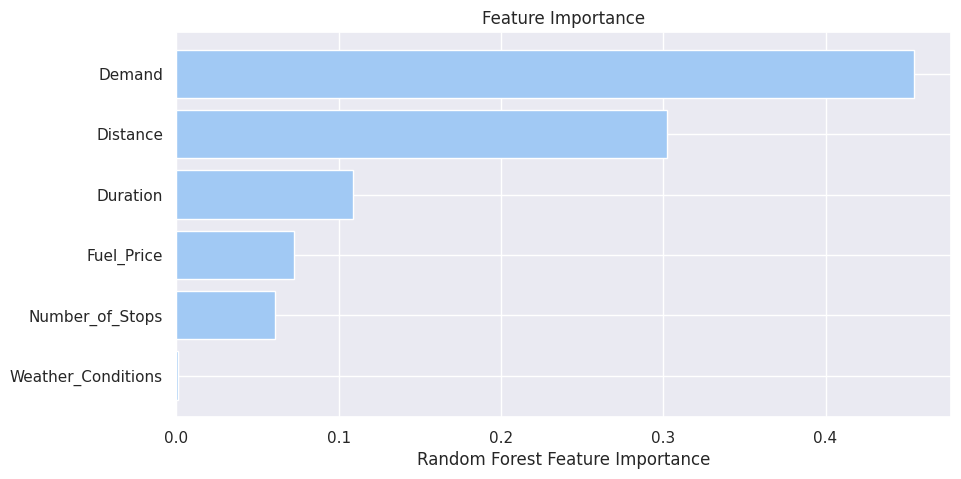

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
xgb_regressor.feature_importances_

array([0.3023311 , 0.10907086, 0.0606219 , 0.45475003, 0.00075641,
       0.07246983], dtype=float32)

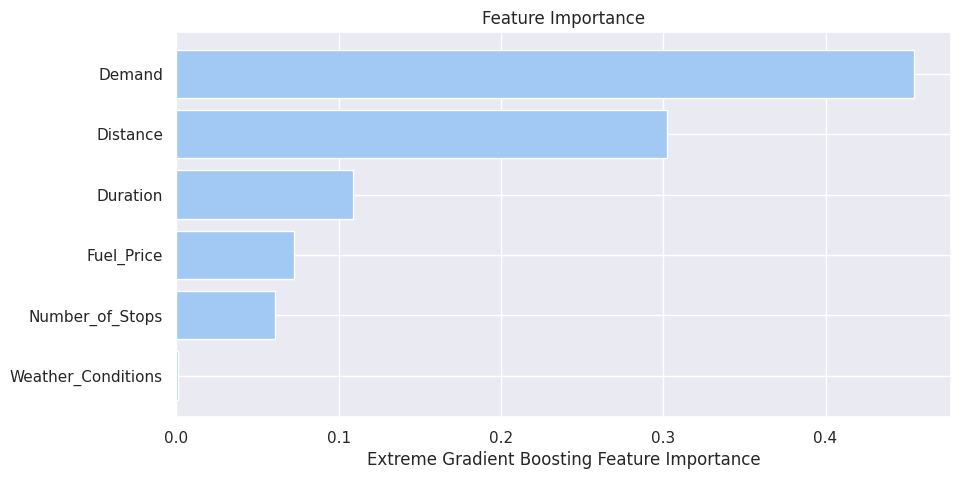

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
#Model Training and Evaluation:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_actual, y_predicted)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")